In [1]:
import pandas as pd
import gensim
from gensim.utils import simple_preprocess
from gensim.parsing.preprocessing import STOPWORDS
from nltk.stem import WordNetLemmatizer, SnowballStemmer
from nltk.stem.porter import *
import numpy as np
np.random.seed(2018)
from wordcloud import WordCloud
from textblob import TextBlob
import matplotlib.pyplot as plt
import nltk
nltk.download('wordnet')

[nltk_data] Downloading package wordnet to /home/1eh/nltk_data...
[nltk_data]   Package wordnet is already up-to-date!


True

In [2]:
def get_message_sentiments(df):
    messages = df['text_tokens'].tolist()

    sentiments = []

    for i in range(len(messages)):
        analysis = TextBlob(' '.join(messages[i]))
        if analysis.sentiment.polarity > 0:
            sentiments.append('positive')
        elif analysis.sentiment.polarity == 0:
            sentiments.append('neutral')
        else:
            sentiments.append('negative')

    df['sentiment'] = sentiments

    return df

In [3]:
def classify_location(df):
    area_class = ['rural','poor','community','communitites','country','countryside','neighborhood',
'impoverished','poverty','broke','underpriviledged','low','income','low-income']
    messages = df['text_tokens'].tolist()
    
    location_class = []
    
    for i in range(len(messages)):
        location_class.append('non-rural')
        for word in area_class:
            if word in messages[i]:
                location_class[i] = 'rural'
    
    df['location'] = location_class
    
    return df

In [4]:
def generate_word_cloud(df, title, filename):
    
    joined_tokens = []
    for x in df['text_tokens'].values:
        joined_tokens.append(' '.join(x))
        
    fulltext = ' '.join(joined_tokens)
    
    
    wc = WordCloud(max_words=100, max_font_size=50, background_color="white").generate(fulltext)
    plt.imshow(wc, interpolation='bilinear')
    plt.axis("off")
    plt.title(title)
    plt.savefig(filename)
    plt.show()

In [5]:
# load data & obtain tweet text
tweets_df = pd.read_csv('Mega_tweetsOnly.csv', error_bad_lines=False);
tweets_text = tweets_df[['cleantext']]
tweets_text['index'] = tweets_text.index
documents = tweets_text

IOPub data rate exceeded.
The notebook server will temporarily stop sending output
to the client in order to avoid crashing it.
To change this limit, set the config variable
`--NotebookApp.iopub_data_rate_limit`.

Current values:
NotebookApp.iopub_data_rate_limit=1000000.0 (bytes/sec)
NotebookApp.rate_limit_window=3.0 (secs)



In [6]:
# define preprocessing
stemmer = SnowballStemmer("english")

def lemmatize_stemming(text):
    return stemmer.stem(WordNetLemmatizer().lemmatize(text, pos='v'))
def preprocess(text):
    result = []
    for token in gensim.utils.simple_preprocess(text):
        if token not in gensim.parsing.preprocessing.STOPWORDS and len(token) > 3:
            result.append(token)#lemmatize_stemming(token))
    return result

In [7]:
doc_sample = documents[documents['index'] == 4310].values[0][0]
print('original document: ')
words = []
for word in doc_sample.split(' '):
    words.append(word)
print(words)
print('\n\n tokenized and lemmatized document: ')
print(preprocess(doc_sample))

original document: 
['Worried', 'about', '#HurricaneFlorence', '', 'or', 'just', 'interested', 'in', 'this', 'monster', 'of', 'a', 'storm?', '', '', 'Now', 'you', 'can', 'track', 'it', 'for', 'free:', '', '', '\xa0']


 tokenized and lemmatized document: 
['worried', 'interested', 'monster', 'storm', 'track', 'free']


In [8]:
processed_docs = documents['cleantext'].map(preprocess)
processed_docs[:10]

0                              [relief, trump, status]
1    [anybody, houston, suffering, little, ptsd, fl...
2    [latest, diario, world, vision, edition_id, th...
3    [need, right, daughter, pawpatrol, weekend, fl...
4    [episcopalrelief, cdcemergency, path, follow, ...
5                                 [stay, safe, strong]
6    [climate, cause, catastrophic, deforestation, ...
7    [bold, think, magically, safe, safe, shelter, ...
8    [good, tips, prepping, electronic, devices, ad...
9    [update, ongoing, situation, north, carolina, ...
Name: cleantext, dtype: object

In [9]:
tweets_df['text_tokens'] = processed_docs

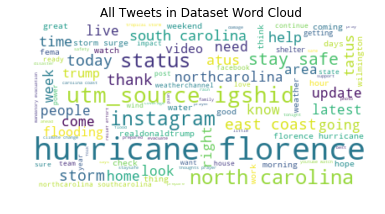

In [10]:
#print(tweets_df)
generate_word_cloud(tweets_df, 'All Tweets in Dataset Word Cloud','word_cloud_all.png')

In [11]:
# assign location classifications
tweets_df = classify_location(tweets_df)

In [12]:
# determine message sentiments
tweets_df = get_message_sentiments(tweets_df)

In [13]:
# separate tweets by sentiment
tweets_df_positive = tweets_df[tweets_df['sentiment'] == 'positive']
tweets_df_negative = tweets_df[tweets_df['sentiment'] == 'negative']
tweets_df_neutral = tweets_df[tweets_df['sentiment'] == 'neutral']

# separate tweets by area class
tweets_df_nonrural = tweets_df[tweets_df['location'] == 'non-rural']
tweets_df_rural = tweets_df[tweets_df['location'] == 'rural']

# separate tweets by sentiment and area class
tweets_df_rural_positive = tweets_df_rural[tweets_df_rural['sentiment'] == 'positive']
tweets_df_rural_negative = tweets_df_rural[tweets_df_rural['sentiment'] == 'negative']
tweets_df_rural_neutral = tweets_df_rural[tweets_df_rural['sentiment'] == 'neutral']

tweets_df_nonrural_positive = tweets_df_nonrural[tweets_df_nonrural['sentiment'] == 'positive']
tweets_df_nonrural_negative = tweets_df_nonrural[tweets_df_nonrural['sentiment'] == 'negative']
tweets_df_nonrural_neutral = tweets_df_nonrural[tweets_df_nonrural['sentiment'] == 'neutral']

print(len(tweets_df_positive))
print(len(tweets_df_negative))
print(len(tweets_df_neutral))

print(len(tweets_df_nonrural))
print(len(tweets_df_rural))

print(len(tweets_df_rural_positive))
print(len(tweets_df_rural_negative))
print(len(tweets_df_rural_neutral))

print(len(tweets_df_nonrural_positive))
print(len(tweets_df_nonrural_negative))
print(len(tweets_df_nonrural_neutral))

46225
17357
75625
137390
1817
743
433
641
45482
16924
74984


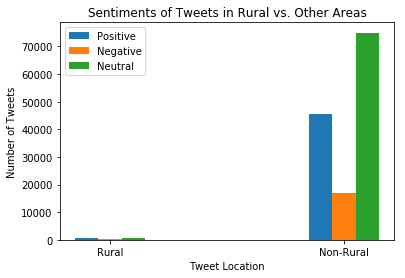

In [14]:
def plot_sentiment_location_breakdown(positives, negatives, neutrals, title, filename):
    
    x = np.array([1, 3])

    #ax = plt.subplot(111)
    plt.bar(x-0.2, positives,width=0.2,align='center', label = 'Positive')
    plt.bar(x, negatives,width=0.2,align='center', label = 'Negative')
    plt.bar(x+0.2, neutrals,width=0.2,align='center', label = 'Neutral')
    #ax.xaxis_date()
    plt.xticks(x, ['Rural', 'Non-Rural'])
    plt.legend()
    plt.xlabel('Tweet Location')
    plt.ylabel('Number of Tweets')
    plt.title(title)
    plt.savefig(filename)
    plt.show()
    
positive_counts = [len(tweets_df_rural_positive), len(tweets_df_nonrural_positive)]
negative_counts = [len(tweets_df_rural_negative), len(tweets_df_nonrural_negative)]
neutral_counts = [len(tweets_df_rural_neutral), len(tweets_df_nonrural_neutral)]

plot_sentiment_location_breakdown(positive_counts, negative_counts, neutral_counts ,'Sentiments of Tweets in Rural vs. Other Areas', 'rural_non_bar.png')

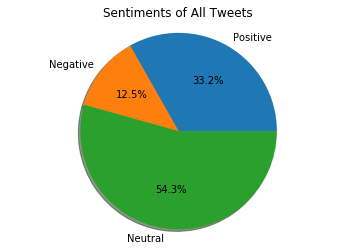

In [15]:
def plot_pie(labels, sizes, title, filename):

    plt.pie(sizes, labels=labels, autopct='%1.1f%%', shadow=True, startangle=0)
    #plt.cm.Set3((i)/8.)
    #patches, texts, junk = plt.pie(sizes, autopct='%1.0f%%')#, autopct='%1.1f%%')
    #plt.legend(patches, labels, loc="lower center", ncol=3)
    
    plt.axis('equal')
    plt.title(title)
    #plt.legend()
    plt.savefig(filename)
    plt.show()

plot_pie(['Positive', 'Negative', 'Neutral'], [len(tweets_df_positive), len(tweets_df_negative), len(tweets_df_neutral)], 'Sentiments of All Tweets', 'sentiments_all.png')

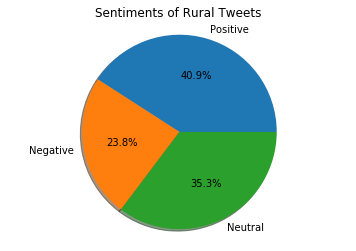

In [16]:
plot_pie(['Positive', 'Negative', 'Neutral'], [len(tweets_df_rural_positive), len(tweets_df_rural_negative), len(tweets_df_rural_neutral)], 'Sentiments of Rural Tweets', 'sentiments_rural.png')

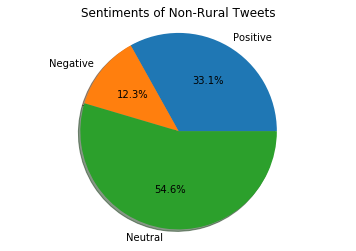

In [17]:
plot_pie(['Positive', 'Negative', 'Neutral'], [len(tweets_df_nonrural_positive), len(tweets_df_nonrural_negative), len(tweets_df_nonrural_neutral)], 'Sentiments of Non-Rural Tweets', 'sentiments_nonrural.png')

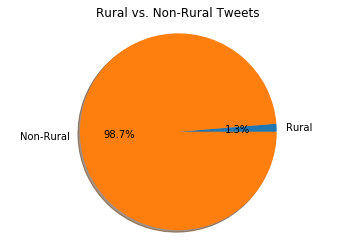

In [18]:
plot_pie(['Rural', 'Non-Rural'], [len(tweets_df_rural), len(tweets_df_nonrural)], 'Rural vs. Non-Rural Tweets', 'rural_non_pie.png')

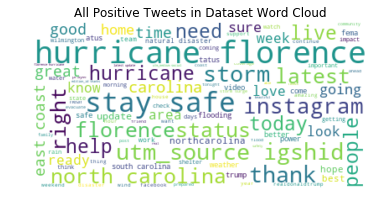

In [19]:
generate_word_cloud(tweets_df_positive, 'All Positive Tweets in Dataset Word Cloud','word_cloud_positive.png')

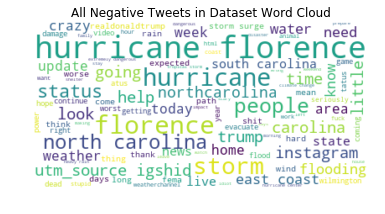

In [20]:
generate_word_cloud(tweets_df_negative, 'All Negative Tweets in Dataset Word Cloud','word_cloud_negative.png')

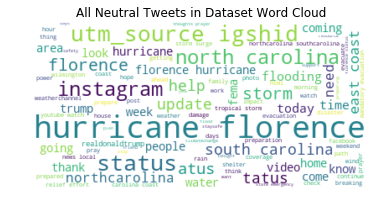

In [21]:
generate_word_cloud(tweets_df_neutral, 'All Neutral Tweets in Dataset Word Cloud','word_cloud_neutral.png')

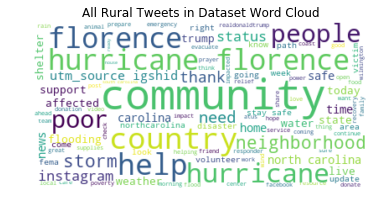

In [22]:
generate_word_cloud(tweets_df_rural, 'All Rural Tweets in Dataset Word Cloud','word_cloud_rural.png')

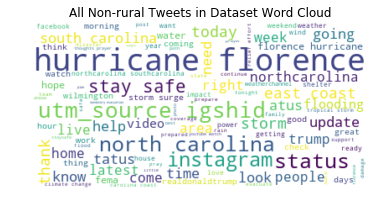

In [23]:
generate_word_cloud(tweets_df_nonrural, 'All Non-rural Tweets in Dataset Word Cloud','word_cloud_nonrural.png')

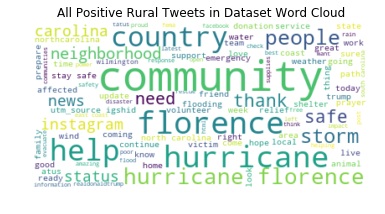

In [24]:
generate_word_cloud(tweets_df_rural_positive, 'All Positive Rural Tweets in Dataset Word Cloud','word_cloud_rural_positive.png')

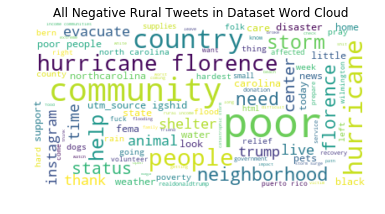

In [25]:
generate_word_cloud(tweets_df_rural_negative, 'All Negative Rural Tweets in Dataset Word Cloud','word_cloud_rural_negative.png')

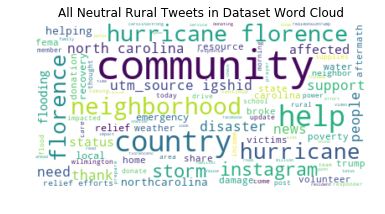

In [26]:
generate_word_cloud(tweets_df_rural_neutral, 'All Neutral Rural Tweets in Dataset Word Cloud','word_cloud_rural_neutral.png')

In [27]:
dictionary = gensim.corpora.Dictionary(processed_docs)
count = 0
for k, v in dictionary.iteritems():
    print(k, v)
    count += 1
    if count > 10:
        break

0 relief
1 status
2 trump
3 anybody
4 flashbacks
5 harvey
6 houston
7 little
8 ptsd
9 right
10 suffering


In [28]:
dictionary.filter_extremes(no_below=15, no_above=0.5, keep_n=100000)

In [29]:
# get bag of words
bow_corpus = [dictionary.doc2bow(doc) for doc in processed_docs]

bow_corpus_positive = [dictionary.doc2bow(doc) for doc in tweets_df_positive['text_tokens']]
bow_corpus_negative = [dictionary.doc2bow(doc) for doc in tweets_df_negative['text_tokens']]
bow_corpus_neutral = [dictionary.doc2bow(doc) for doc in tweets_df_neutral['text_tokens']]

bow_corpus_nonrural = [dictionary.doc2bow(doc) for doc in tweets_df_nonrural['text_tokens']]
bow_corpus_rural = [dictionary.doc2bow(doc) for doc in tweets_df_rural['text_tokens']]

bow_corpus[4310]

[(71, 1), (101, 1), (632, 1), (882, 1), (1217, 1), (1837, 1)]

In [30]:
bow_doc_4310 = bow_corpus[4310]
for i in range(len(bow_doc_4310)):
    print("Word {} (\"{}\") appears {} time.".format(bow_doc_4310[i][0], 
                                               dictionary[bow_doc_4310[i][0]], 
bow_doc_4310[i][1]))

Word 71 ("track") appears 1 time.
Word 101 ("storm") appears 1 time.
Word 632 ("worried") appears 1 time.
Word 882 ("free") appears 1 time.
Word 1217 ("interested") appears 1 time.
Word 1837 ("monster") appears 1 time.


In [31]:
from gensim import corpora, models
tfidf = models.TfidfModel(bow_corpus)
corpus_tfidf = tfidf[bow_corpus]
from pprint import pprint
for doc in corpus_tfidf:
    pprint(doc)
    break
#print(bow_corpus.shape)

[(0, 0.6438939978080203), (1, 0.4725104518554997), (2, 0.6017760318209068)]


In [32]:
lda_model = gensim.models.LdaMulticore(bow_corpus, num_topics=5, id2word=dictionary, passes=2, workers=2)
#print(bow_corpus)

In [33]:
for idx, topic in lda_model.print_topics(-1):
    print('Topic: {} \nWords: {}'.format(idx, topic))

Topic: 0 
Words: 0.033*"carolina" + 0.022*"north" + 0.018*"florence" + 0.017*"live" + 0.017*"hurricane" + 0.014*"facebook" + 0.014*"south" + 0.012*"emergency" + 0.011*"state" + 0.011*"news"
Topic: 1 
Words: 0.042*"status" + 0.016*"atus" + 0.015*"tatus" + 0.014*"northcarolina" + 0.013*"pets" + 0.012*"people" + 0.009*"evacuation" + 0.009*"ready" + 0.008*"animals" + 0.008*"need"
Topic: 2 
Words: 0.078*"florence" + 0.068*"hurricane" + 0.023*"storm" + 0.018*"news" + 0.016*"coast" + 0.012*"weather" + 0.011*"carolina" + 0.010*"carolinas" + 0.010*"html" + 0.009*"east"
Topic: 3 
Words: 0.032*"safe" + 0.027*"help" + 0.026*"utm_source" + 0.024*"instagram" + 0.024*"igshid" + 0.020*"stay" + 0.018*"hurricane" + 0.014*"florence" + 0.012*"affected" + 0.012*"path"
Topic: 4 
Words: 0.018*"trump" + 0.016*"water" + 0.013*"like" + 0.011*"florence" + 0.010*"realdonaldtrump" + 0.010*"people" + 0.009*"power" + 0.009*"hurricane" + 0.008*"going" + 0.007*"flood"


In [34]:
lda_model_positive = gensim.models.LdaMulticore(bow_corpus_positive, num_topics=5, id2word=dictionary, passes=2, workers=2)
#print(bow_corpus)
for idx, topic in lda_model_positive.print_topics(-1):
    print('Topic: {} \nWords: {}'.format(idx, topic))

Topic: 0 
Words: 0.034*"hurricane" + 0.028*"florence" + 0.014*"ready" + 0.014*"trump" + 0.010*"good" + 0.008*"storm" + 0.008*"disaster" + 0.007*"people" + 0.006*"natural" + 0.005*"better"
Topic: 1 
Words: 0.033*"live" + 0.025*"florence" + 0.023*"news" + 0.021*"hurricane" + 0.014*"weather" + 0.010*"latest" + 0.010*"facebook" + 0.009*"updates" + 0.009*"watch" + 0.008*"carolina"
Topic: 2 
Words: 0.063*"safe" + 0.034*"stay" + 0.021*"utm_source" + 0.019*"instagram" + 0.019*"igshid" + 0.016*"hurricane" + 0.016*"florence" + 0.015*"path" + 0.013*"storm" + 0.012*"hope"
Topic: 3 
Words: 0.034*"hurricane" + 0.030*"florence" + 0.029*"latest" + 0.021*"storm" + 0.016*"carolina" + 0.014*"coast" + 0.012*"north" + 0.011*"thanks" + 0.011*"right" + 0.009*"rain"
Topic: 4 
Words: 0.022*"help" + 0.014*"water" + 0.012*"florence" + 0.011*"safe" + 0.011*"status" + 0.009*"relief" + 0.008*"need" + 0.008*"hurricane" + 0.007*"stay" + 0.007*"thanks"


In [35]:
lda_model_negative = gensim.models.LdaMulticore(bow_corpus_negative, num_topics=5, id2word=dictionary, passes=2, workers=2)
#print(bow_corpus)
for idx, topic in lda_model_negative.print_topics(-1):
    print('Topic: {} \nWords: {}'.format(idx, topic))

Topic: 0 
Words: 0.017*"florence" + 0.014*"hurricane" + 0.011*"game" + 0.011*"fema" + 0.010*"help" + 0.006*"trump" + 0.006*"flood" + 0.006*"northcarolina" + 0.006*"storm" + 0.005*"news"
Topic: 1 
Words: 0.029*"hurricane" + 0.024*"florence" + 0.022*"storm" + 0.013*"utm_source" + 0.011*"instagram" + 0.011*"igshid" + 0.011*"rain" + 0.011*"weather" + 0.011*"expected" + 0.009*"flooding"
Topic: 2 
Words: 0.028*"hurricane" + 0.026*"florence" + 0.015*"people" + 0.014*"carolina" + 0.012*"north" + 0.010*"trump" + 0.008*"news" + 0.007*"storm" + 0.006*"dead" + 0.006*"help"
Topic: 3 
Words: 0.039*"florence" + 0.032*"hurricane" + 0.014*"coast" + 0.012*"storm" + 0.011*"like" + 0.009*"dangerous" + 0.009*"east" + 0.009*"news" + 0.008*"weather" + 0.007*"flooding"
Topic: 4 
Words: 0.015*"news" + 0.013*"people" + 0.011*"hurricane" + 0.011*"florence" + 0.010*"storm" + 0.008*"water" + 0.007*"hard" + 0.007*"fake" + 0.006*"evacuate" + 0.006*"watch"


In [36]:
lda_model_neutral = gensim.models.LdaMulticore(bow_corpus_neutral, num_topics=5, id2word=dictionary, passes=2, workers=2)
#print(bow_corpus)
for idx, topic in lda_model_neutral.print_topics(-1):
    print('Topic: {} \nWords: {}'.format(idx, topic))

Topic: 0 
Words: 0.052*"hurricane" + 0.052*"florence" + 0.016*"tatus" + 0.011*"coast" + 0.011*"trump" + 0.010*"weather" + 0.010*"news" + 0.008*"watch" + 0.008*"people" + 0.007*"evacuate"
Topic: 1 
Words: 0.073*"florence" + 0.044*"hurricane" + 0.041*"carolina" + 0.029*"north" + 0.020*"storm" + 0.017*"atus" + 0.014*"south" + 0.014*"path" + 0.013*"northcarolina" + 0.012*"prayers"
Topic: 2 
Words: 0.045*"utm_source" + 0.044*"instagram" + 0.043*"igshid" + 0.029*"hurricane" + 0.024*"florence" + 0.016*"news" + 0.011*"storm" + 0.009*"wind" + 0.008*"html" + 0.008*"weather"
Topic: 3 
Words: 0.066*"status" + 0.021*"facebook" + 0.016*"power" + 0.014*"water" + 0.013*"northcarolina" + 0.010*"florence" + 0.009*"rescue" + 0.009*"people" + 0.009*"wilmington" + 0.007*"pets"
Topic: 4 
Words: 0.035*"help" + 0.016*"relief" + 0.016*"hurricane" + 0.014*"need" + 0.011*"thank" + 0.010*"florence" + 0.009*"affected" + 0.009*"victims" + 0.009*"disaster" + 0.007*"efforts"


In [37]:
lda_model_rural = gensim.models.LdaMulticore(bow_corpus_rural, num_topics=5, id2word=dictionary, passes=2, workers=2)
#print(bow_corpus)
for idx, topic in lda_model_rural.print_topics(-1):
    print('Topic: {} \nWords: {}'.format(idx, topic))

Topic: 0 
Words: 0.023*"country" + 0.014*"community" + 0.012*"hurricane" + 0.012*"florence" + 0.009*"neighborhood" + 0.005*"safe" + 0.005*"news" + 0.005*"utm_source" + 0.005*"power" + 0.005*"people"
Topic: 1 
Words: 0.022*"florence" + 0.021*"hurricane" + 0.018*"community" + 0.010*"storm" + 0.010*"help" + 0.008*"carolina" + 0.007*"country" + 0.007*"north" + 0.007*"people" + 0.005*"utm_source"
Topic: 2 
Words: 0.021*"community" + 0.013*"poor" + 0.013*"florence" + 0.011*"people" + 0.009*"hurricane" + 0.007*"country" + 0.007*"news" + 0.007*"neighborhood" + 0.006*"help" + 0.005*"storm"
Topic: 3 
Words: 0.027*"community" + 0.021*"hurricane" + 0.013*"poor" + 0.009*"florence" + 0.009*"country" + 0.007*"help" + 0.006*"carolina" + 0.005*"need" + 0.005*"people" + 0.005*"like"
Topic: 4 
Words: 0.040*"community" + 0.016*"help" + 0.015*"florence" + 0.012*"hurricane" + 0.008*"neighborhood" + 0.007*"safe" + 0.006*"people" + 0.006*"country" + 0.006*"relief" + 0.006*"support"


In [38]:
lda_model_nonrural = gensim.models.LdaMulticore(bow_corpus_nonrural, num_topics=5, id2word=dictionary, passes=2, workers=2)
#print(bow_corpus)
for idx, topic in lda_model_nonrural.print_topics(-1):
    print('Topic: {} \nWords: {}'.format(idx, topic))

Topic: 0 
Words: 0.032*"safe" + 0.020*"stay" + 0.017*"people" + 0.013*"like" + 0.012*"path" + 0.009*"going" + 0.009*"storm" + 0.009*"hope" + 0.008*"status" + 0.007*"praying"
Topic: 1 
Words: 0.074*"florence" + 0.061*"hurricane" + 0.031*"carolina" + 0.022*"north" + 0.021*"storm" + 0.017*"news" + 0.015*"coast" + 0.013*"status" + 0.012*"trump" + 0.010*"northcarolina"
Topic: 2 
Words: 0.028*"florence" + 0.026*"hurricane" + 0.016*"facebook" + 0.011*"latest" + 0.011*"emergency" + 0.010*"weather" + 0.009*"thoughts" + 0.008*"thanks" + 0.007*"change" + 0.007*"news"
Topic: 3 
Words: 0.037*"help" + 0.016*"relief" + 0.013*"need" + 0.012*"florence" + 0.012*"thank" + 0.012*"hurricane" + 0.010*"disaster" + 0.009*"affected" + 0.009*"victims" + 0.008*"support"
Topic: 4 
Words: 0.037*"utm_source" + 0.033*"instagram" + 0.033*"igshid" + 0.020*"hurricane" + 0.019*"live" + 0.015*"florence" + 0.014*"watch" + 0.011*"atus" + 0.010*"power" + 0.009*"storm"


In [39]:
# tf-idf
from sklearn.feature_extraction.text import TfidfVectorizer

def tokenize_and_stem(text):
    # first tokenize by sentence, then by word to ensure that punctuation is caught as it's own token
    tokens = [word for sent in nltk.sent_tokenize(text) for word in nltk.word_tokenize(sent)]
    filtered_tokens = []
    # filter out any tokens not containing letters (e.g., numeric tokens, raw punctuation)
    for token in tokens:
        if re.search('[a-zA-Z]', token):
            filtered_tokens.append(token)
    stems = [stemmer.stem(t) for t in filtered_tokens]
    return stems

def tokenize_only(text):
    # first tokenize by sentence, then by word to ensure that punctuation is caught as it's own token
    tokens = [word.lower() for sent in nltk.sent_tokenize(text) for word in nltk.word_tokenize(sent)]
    filtered_tokens = []
    # filter out any tokens not containing letters (e.g., numeric tokens, raw punctuation)
    for token in tokens:
        if re.search('[a-zA-Z]', token):
            filtered_tokens.append(token)
    return filtered_tokens

tweet_text = []
for text in tweets_df['text_tokens']:
    tweet_text.append(' '.join(text))
    
tweet_text_rural = []
for text in tweets_df['text_tokens']:
    tweet_text_rural.append(' '.join(text))
    
tweet_text_nonrural = []
for text in tweets_df['text_tokens']:
    tweet_text_nonrural.append(' '.join(text))

# tokenize and stem tweets
totalvocab_stemmed = []
totalvocab_tokenized = []
for i in tweet_text: #tweets_df['cleantext']:
    allwords_stemmed = tokenize_and_stem(i) #for each item in 'synopses', tokenize/stem
    totalvocab_stemmed.extend(allwords_stemmed) #extend the 'totalvocab_stemmed' list

    allwords_tokenized = tokenize_only(i)
    totalvocab_tokenized.extend(allwords_tokenized)

vocab_frame = pd.DataFrame({'words': totalvocab_tokenized}, index = totalvocab_stemmed)
print('there are ' + str(vocab_frame.shape[0]) + ' items in vocab_frame')

print(vocab_frame.head())

#define vectorizer parameters
tfidf_vectorizer = TfidfVectorizer(max_df=0.99, max_features=200000,
                                 min_df=0.05, stop_words='english',
                                 use_idf=True, tokenizer=tokenize_and_stem, ngram_range=(1,3))

tfidf_matrix = tfidf_vectorizer.fit_transform(tweet_text) #fit the vectorizer to synopses

print(tfidf_matrix.shape)

there are 1348229 items in vocab_frame
           words
relief    relief
trump      trump
status    status
anybodi  anybody
houston  houston
(139207, 10)


K-Means


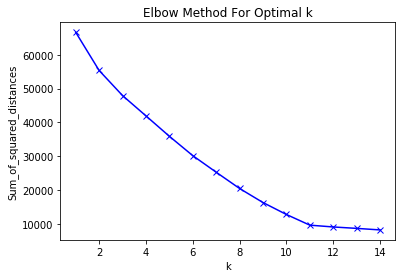

In [40]:
print("K-Means")

from sklearn.cluster import KMeans

Sum_of_squared_distances = []
ks = range(1,15)
for k in ks:
    km = KMeans(n_clusters=k)
    km = km.fit(tfidf_matrix)
    Sum_of_squared_distances.append(km.inertia_)

#clusters = km.labels_.tolist()
plt.plot(ks, Sum_of_squared_distances, 'bx-')
plt.xlabel('k')
plt.ylabel('Sum_of_squared_distances')
plt.title('Elbow Method For Optimal k')
plt.show()

In [41]:
# 11 chosen as optimal number of clusters
num_clusters = 11
km = KMeans(n_clusters=num_clusters)
km.fit(tfidf_matrix)

tweets_df['kmeans'] = km.labels_

tfidfs = []
for t in tfidf_matrix.todense():
    tfidfs.append(np.array(t[0][0][0][0])[0])

tweets_df['tfidf'] = tfidfs
print(tweets_df['tfidf'])
print(tfidf_matrix.todense().shape)

0         [0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 1.0, 0.0, ...
1         [0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, ...
2         [0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, ...
3         [0.0, 1.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, ...
4         [0.0, 0.0, 0.0, 1.0, 0.0, 0.0, 0.0, 0.0, 0.0, ...
5         [0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 1.0, 0.0, 0.0, ...
6         [0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, ...
7         [0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 1.0, 0.0, 0.0, ...
8         [0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, ...
9         [1.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, ...
10        [0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, ...
11        [0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, ...
12        [0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 1.0, 0.0, 0.0, ...
13        [0.15164608174859684, 0.5921415926443562, 0.0,...
14        [0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, ...
15        [0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 1.0, 0.0, 0.0, ...
16        [0.0, 0.7052449041099276, 0.0,

In [42]:
from sklearn.externals import joblib

#uncomment the below to save your model
#since I've already run my model I am loading from the pickle

joblib.dump(km,  'doc_cluster.pkl')

km = joblib.load('doc_cluster.pkl')
clusters = km.labels_.tolist()
tweet_indices = tweets_df.index

tweets = { 'tweet_indices': tweet_indices, 'tweet_text': tweet_text, 'cluster': clusters}

frame = pd.DataFrame(tweets, index = [clusters] , columns = ['tweet_indices', 'cluster'])

frame['cluster'].value_counts()

0     65059
2     12608
4      7874
1      7596
3      7556
6      7259
5      7071
8      6780
7      6535
10     5871
9      4998
Name: cluster, dtype: int64

In [43]:
terms = tfidf_vectorizer.get_feature_names()

term_labels = []

print("Top terms per cluster:")
print()
#sort cluster centers by proximity to centroid
order_centroids = km.cluster_centers_.argsort()[:, ::-1]

for i in range(num_clusters):
    print("Cluster %d words:" % i, end='')
    km_words = [str(i) + ':']
    for ind in order_centroids[i, :10]: #replace 6 with n words per cluster
        print(' %s' % vocab_frame.ix[terms[ind].split(' ')].values.tolist()[0][0].encode('utf-8', 'ignore'), end=',')
        km_words.append(vocab_frame.ix[terms[ind].split(' ')].values.tolist()[0][0])#.encode('utf-8', 'ignore'))
    term_labels.append(' '.join(km_words))
    print() #add whitespace
    print() #add whitespace

print()
print()
print(term_labels)

Top terms per cluster:

Cluster 0 words:

/home/1eh/.local/lib/python3.6/site-packages/ipykernel_launcher.py:14: DeprecationWarning: 
.ix is deprecated. Please use
.loc for label based indexing or
.iloc for positional indexing

See the documentation here:
http://pandas.pydata.org/pandas-docs/stable/indexing.html#ix-indexer-is-deprecated
  
/home/1eh/.local/lib/python3.6/site-packages/ipykernel_launcher.py:15: DeprecationWarning: 
.ix is deprecated. Please use
.loc for label based indexing or
.iloc for positional indexing

See the documentation here:
http://pandas.pydata.org/pandas-docs/stable/indexing.html#ix-indexer-is-deprecated
  from ipykernel import kernelapp as app


 b'utm_source', b'storm', b'status', b'safe', b'news', b'hurricanes', b'hurricanes', b'helping', b'florence', b'carolina',

Cluster 1 words: b'status', b'florence', b'safe', b'hurricanes', b'helping', b'storm', b'carolina', b'hurricanes', b'news', b'utm_source',

Cluster 2 words: b'florence', b'hurricanes', b'hurricanes', b'news', b'carolina', b'storm', b'helping', b'utm_source', b'safe', b'status',

Cluster 3 words: b'florence', b'hurricanes', b'news', b'carolina', b'storm', b'utm_source', b'helping', b'safe', b'status', b'hurricanes',

Cluster 4 words: b'hurricanes', b'florence', b'news', b'storm', b'utm_source', b'carolina', b'safe', b'helping', b'status', b'hurricanes',

Cluster 5 words: b'carolina', b'florence', b'hurricanes', b'hurricanes', b'news', b'storm', b'utm_source', b'safe', b'helping', b'status',

Cluster 6 words: b'storm', b'florence', b'hurricanes', b'carolina', b'hurricanes', b'news', b'utm_source', b'safe', b'status', b'helping',

Cluster 7 words: b'safe', b'storm', 

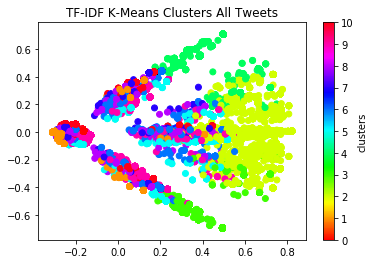

In [44]:
from sklearn.decomposition import PCA
def plot_kmeans_clusters(data, labels, term_labels, title, filename):
    #print(data)
    X = data#.todense()
    #print(X)
    pca = PCA(n_components=2)
    principalComponents = pca.fit_transform(X)
    
    c=labels.astype(float)
    plt.scatter(principalComponents[:,0], principalComponents[:,1], c=labels.astype(float), cmap='hsv')#model.labels_.astype(float))
    plt.colorbar(ticks=range(11), label='clusters')
    plt.title(title)
    plt.savefig(filename)
    plt.show()

def plot_kmeans_clusters2(data, labels, class_words):
    
    pca = PCA(n_components=2)
    principalComponents = pca.fit_transform(data)
    
    cs = [0 for x in range(len(class_words))]
    
    print(cs)
    
    for i in range(0, principalComponents.shape[0]):
        print(i)
        for j in range(len(cs)):
            if labels[i] == j:
                cs[j] = plt.scatter(principalComponents[i,0],principalComponents[i,1])#,c='r')
    plt.legend(cs, class_words)#['Cluster 1', 'Cluster 0','Cluster 2'])
    plt.title('K-means clusters the Iris dataset into 3 clusters')
    plt.show()

plot_kmeans_clusters(tfidf_matrix.todense(), km.labels_, term_labels, 'TF-IDF K-Means Clusters All Tweets', 'kmeans_all.png')

In [45]:
#plot_kmeans_clusters(tfidf_matrix.todense(), np.array(tweets_df['sentiment'].astype('category').cat.codes))

In [46]:
#plot_kmeans_clusters(tfidf_matrix.todense(), np.array(tweets_df['location'].astype('category').cat.codes))

In [47]:
# separate tweets by area class
tweets_df_nonrural = tweets_df[tweets_df['location'] == 'non-rural']
tweets_df_rural = tweets_df[tweets_df['location'] == 'rural']

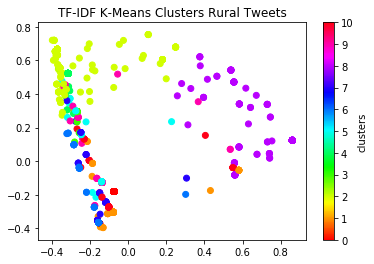

In [48]:
#print(tweets_df_rural['tfidf'].shape)
plot_kmeans_clusters(list(tweets_df_rural['tfidf']), np.array(tweets_df_rural['kmeans']), term_labels, 'TF-IDF K-Means Clusters Rural Tweets', 'kmeans_rural.png')

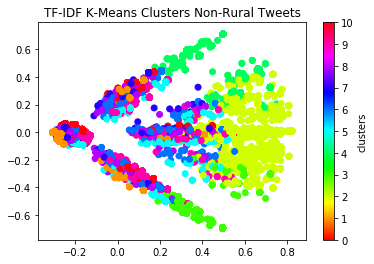

In [49]:
#plot nonrural 
plot_kmeans_clusters(list(tweets_df_nonrural['tfidf']), tweets_df_nonrural['kmeans'], term_labels, 'TF-IDF K-Means Clusters Non-Rural Tweets', 'kmeans_nonrural.png')

[65059, 12608, 7874, 7596, 7556, 7259, 7071, 6780, 6535, 5871, 4998]


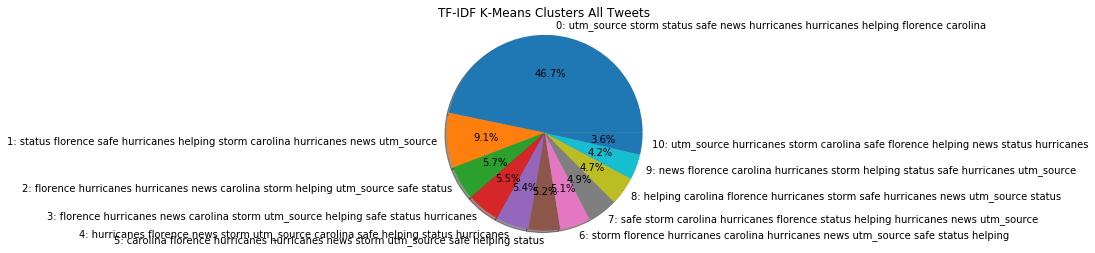

In [50]:
kmeans_counts = tweets_df['kmeans'].value_counts()
print(kmeans_counts.tolist())
plot_pie(term_labels, kmeans_counts, 'TF-IDF K-Means Clusters All Tweets', 'kmeans_pie.png')

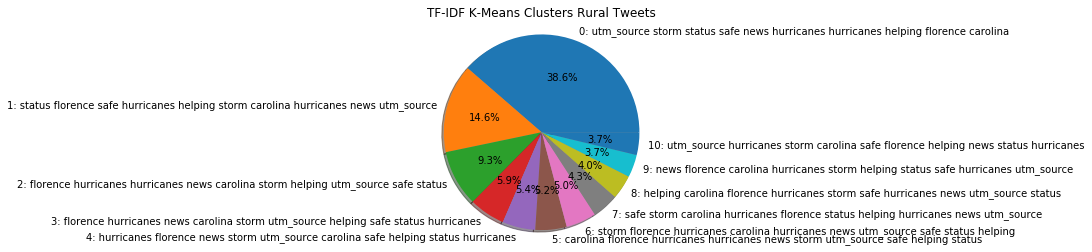

In [51]:
kmeans_counts = tweets_df_rural['kmeans'].value_counts()
plot_pie(term_labels, kmeans_counts, 'TF-IDF K-Means Clusters Rural Tweets', 'kmeans_rural_pie.png')

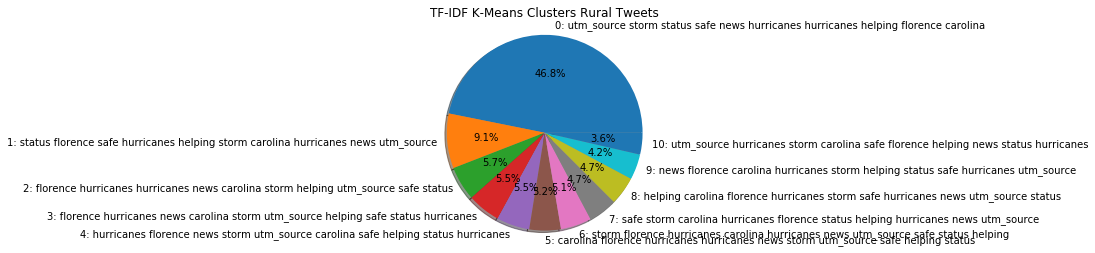

In [52]:
kmeans_counts = tweets_df_nonrural['kmeans'].value_counts()
plot_pie(term_labels, kmeans_counts, 'TF-IDF K-Means Clusters Rural Tweets', 'kmeans_nonrural_pie.png')